In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the seed for the random number generator for reproducibility
np.random.seed(13)

# Loading the data
data = pd.read_csv('../data/raw/Walmart_Store_sales.csv')

# Review the data
data.head()

df = pd.DataFrame(data)

# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

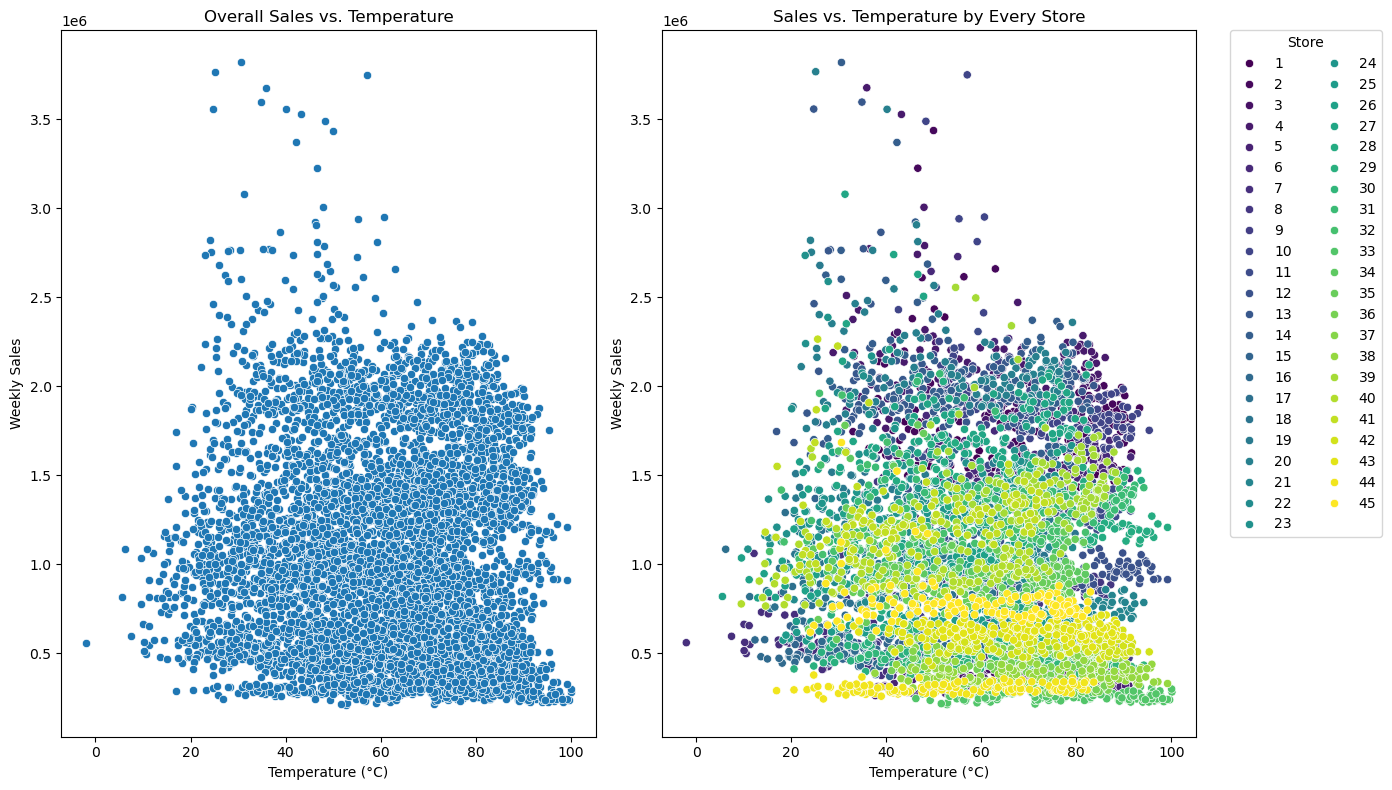

In [3]:
# Sales vs Temperature plots

# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# First plot: Overall Sales vs. Temperature
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', ax=axes[0])
axes[0].set_title('Overall Sales vs. Temperature')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Weekly Sales')

# Second plot: Sales vs. Temperature by every store
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Store', palette='viridis', legend='full', ax=axes[1])
axes[1].set_title('Sales vs. Temperature by Every Store')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Weekly Sales')
axes[1].legend(title='Store', bbox_to_anchor=(1.05, 1.01), loc='upper left', ncol=2)

plt.tight_layout()
plt.show()

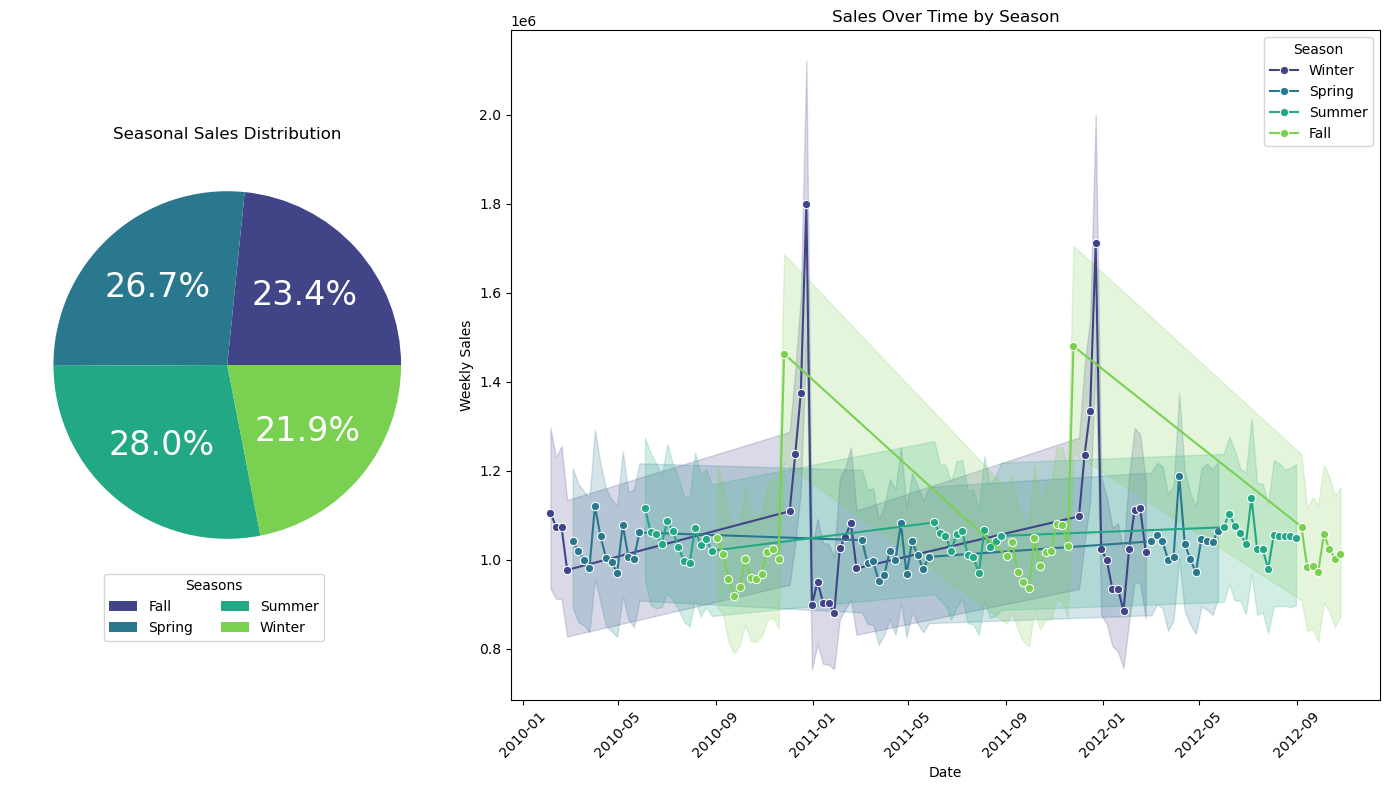

In [40]:
# Seasonal sales

# Function to determine the season from the date
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a new 'Season' column
df['Season'] = df['Date'].apply(get_season)

# Aggregate sales by season
seasonal_sales = df.groupby('Season')['Weekly_Sales'].sum()

# Use the same color palette as previous plots
palette = sns.color_palette('viridis', len(seasonal_sales))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [1, 2]})

# Plot 1: Pie Chart of Seasonal Sales Distribution
wedges, texts, autotexts = ax1.pie(seasonal_sales, labels=seasonal_sales.index, autopct='%1.1f%%', colors=palette, textprops=dict(color="w"))

# Increasing the size of the label's font for better accessibility and readability
for autotext in autotexts:
    autotext.set_fontsize(24)

ax1.set_title('Seasonal Sales Distribution')
ax1.legend(title='Seasons', bbox_to_anchor=(0.2, -0.15), loc='lower left', ncol=2)

# Plot 2: Time Series Plot of Sales Over Time by Season
sns.lineplot(data=df, x='Date', y='Weekly_Sales', hue='Season', palette='viridis', marker='o', ax=ax2)
ax2.set_title('Sales Over Time by Season')
ax2.set_xlabel('Date')
ax2.set_ylabel('Weekly Sales')
ax2.legend(title='Season')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to make room for the titles and labels
plt.tight_layout()

plt.show()